# Exercise 2
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

#### Import all dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd
import gzip

#### Generation of data

In [2]:
# sigmoid takes into account energy difference =2
SPINS = False
# centering trick
centering = False
# type of encoding
one_hot = False
# type of gradient: Adam or Vanilla SGD
ADAM = True
# Data
data = "b" # else "c"
# If we want energy (computationally demanding)
Iwant_energy = True
# CD-n iterations
CD = 1
# mini batch size for the SGD in the RBM training
mini_batch_size = 50

In [3]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.1  # 0.1 then 
#
# a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

if data == "b":
    for n in range(N):
        # kind of the first slot
        k = np.random.randint(0,2)
        # label
        y[n] = k
        i0=0
        for g in range(G):
            # normal choice
            i = np.random.randint(0, AA[k])
            j = i + i0 + k*A0
            if np.random.random()<q:
                # normal choice
                i = np.random.randint(0,A)
                j = i + i0
            
            if(n<2): 
                print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
            # one-hot encoding
            x[n][j] = 1
            i0= i0 + A
            k = 1 - k
                    
        if(n<3): print(x[n], y[n])

    print("...")    

elif data == "c":
    x = np.loadtxt('Data_c/x_RBM_q0.2.dat', delimiter=" ",dtype=int)

else:
    print("Select your data")

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=2, j=6, AA[k]=2
k=0, g=2, i0=8, i=1, j=9, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0] 1
...


In [4]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0

In [5]:
# We name "v" for "visible" instead of using x
v = np.copy(x)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

if SPINS:
    GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
    v = 2*v - 1
    vmin = -1
else:
    GAP = 1
    vmin = 0

# RBM, number of hidden units
M = 6 # if not one_hot else 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


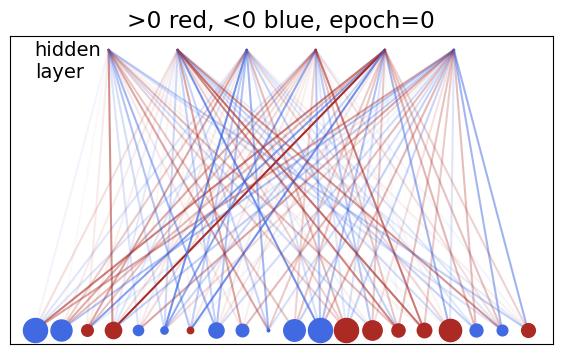

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(3*np-1) - 0.5) if np == 1 else f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return '#ab2a24'
    elif val<0: return 'royalblue'
    else: return 'black'
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=min(300, A*abs(a[i])), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0]
act= [ 0.12148004  0.28349252 -0.95747708  1.3998517   0.20832786 -0.14909014]
prob= [0.53033272 0.57040225 0.27738361 0.80216035 0.55189441 0.46279635]
output= [0 0 0 1 0 0]


array([0, 0, 0, 1, 0, 0])

We use the method of fixing the one-hot encoding. We remind that, given the possibilities $[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]$, the energy of each group is given by $E = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_ih_\mu$. (In theory there would also be the term $\sum_\mu b_\mu h_\mu$. However, since this term is the same for all of the possible encodings, we will neglect it when evaluating the probability of each encoding).

In [8]:
def one_hot_generator(nBlocks, w, h, a):
    encodings = [np.array([1,0,0,0]),np.array([0,1,0,0]),np.array([0,0,1,0]),np.array([0,0,0,1])]
    if SPINS:
        for i in range(len(encodings)):
            encodings[i] = 2*encodings[i] - np.ones(A, dtype=int)
    vf = np.zeros(L) #initialized as zeros
    for block in range(nBlocks):
        # try all encodings and choose one at random with probability given my maxwell boltzmann
        probabilities = []
        for encoding in encodings: #for each possible encoding 1000, 0100, ...
            energy = np.dot(a[block*4: (block+1)*4] + w[block*4:(block+1)*4, ]@h, encoding)
            probabilities.append(np.exp(energy))    # ? *Gap ?
        probabilities = probabilities / sum(probabilities) #normalize    
        cumulatives = [sum(probabilities[:i+1]) for i in range(4)] 
        random = np.random.uniform(0., 1.)
        choice = 0
        for i in range(4):
            if cumulatives[i] > random:
                choice = i
                break
        #Now choice is index of the encoding we want.
        vf[block*4:(block+1)*4] = encodings[choice]
    return vf

## ADAM class

In [9]:
class AdamOptim():
    def __init__(self, eta=1e-3, beta1=0.9, beta2=0.99, epsilon=1e-8):
        self.m_dw, self.v_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.v_da = np.zeros(L), np.zeros(L)
        self.m_db, self.v_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases of hidden units *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.v_da = self.beta2*self.v_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_da_corr = self.v_da/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)


        ## update weights and biases
        w = w + self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        a = a + self.eta*(m_da_corr/(np.sqrt(v_da_corr)+self.epsilon))
        b = b + self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        # m_dw, m_da, m_db = self.m_dw, self.m_da, self.m_db
        return w, a, b #, self.m_dw, self.m_da, self.m_db

### Vanilla SGD

In [10]:
def vanilla(w, a, b, dw, da, db):
# basic step of vanilla gradient descent, from eq.(211)
    w = w + dw
    a = a + da
    b = b + db
    return w, a, b

### Energy via log likelihood

In [11]:
def energy_is(v, h, w, a, b):
    eng = - np.dot(a,v) - np.dot(b,h) - np.dot(v.T@w,h)
    return eng

def one_hot_generator2(input, A, G):
    encodings = [np.array([0,0,0,1]), np.array([0,0,1,0]), np.array([0,1,0,0]), np.array([1,0,0,0])]
    output = []
    for i in input:
        output.append(encodings[int(i)])
    output = np.array(output)
    output = output.reshape(A*G,)
    if SPINS:
        output = output*GAP + np.full(A*G,vmin) 
    return output

def log_likelihood(w, a, b, v, h):
    eng, Z, L = 0, 0, 0 # Z = sum_x 
    for i in range(N):
        eng += energy_is(v[i], h[i], w, a, b)
    eng /= v.shape[0] # N

    num_config = (A**G)*(2**M)
    for i in range(int(A**G)): # A**G = 4**5 1024, 2*M
        vgen = np.base_repr(i, base=A).zfill(G)
        vgen = one_hot_generator2(vgen, A, G)
        for j in range(int(2**M)):
            hgen = np.base_repr(j, base=2).zfill(M) 
            hgen = np.array([int(x) for x in str(hgen)])
            if SPINS:
                hgen = hgen*GAP + np.full(M, vmin)
            #print(f"vtype = {vgen.dtype}, hgen.dtype = {hgen.dtype}")
            #print(f"vgen={vgen}")
            Z += np.exp(-energy_is(vgen, hgen, w, a, b))
            # print(Z)


    # # prova:
    # for i in range(N):
    #     single_energy = 0   # energy for each v[i]
    #     for j in range(N):
    #         single_energy += np.exp(-energy_is(v[i], h[j], w, a, b))
    #     eng += np.log(single_energy)
    # # eng /= v.shape[0]
    #     L += np.log(eng) - np.log(Z)     # single value log-likelihood -> since log, from product to sum
            

    L = eng + np.log(Z) # now L is going to be minimized    
    return L

In [12]:
def E_AAI(v, h):
    # this function works properly only with [0, 1] representation
    if SPINS:
        v = ((v + 1)/2).astype(int)
        h = ((h + 1)/2).astype(int)
    # let's calculate A_S & A_T
    A_S, A_T = 0, 0
    # all_distances_TS, all_distances_ST, all_distances_SS, all_distances_TT = np.zeros((v.shape[0], v.shape[0])),np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0]))
    for i in range(v.shape[0]):
        distances_TS = np.sum((h[i] ^ v), axis=1)
        distances_ST = np.sum((v[i] ^ h), axis=1)
        distances_SS = np.sum((v[i] ^ v), axis=1)
        distances_TT = np.sum((h[i] ^ h), axis=1)
        # update of the diagonal element
        # In this way the diagonal elements are 0: we sum to the diagonal element +30 (+20 it's still ok) so that the diagonal elements are not spotted
        # This because there could be non diagonal elements for which the distance is zero.
        distances_SS[i] = 30
        distances_TT[i] = 30

        if np.min(distances_SS) < np.min(distances_ST):
            A_S += 1
        elif np.min(distances_SS) == np.min(distances_ST) and one_hot:
            A_S += 0.5
        else:
            A_S += 0
        
        if np.min(distances_TT) < np.min(distances_TS):
            A_T += 1
        elif np.min(distances_TT) == np.min(distances_TS) and one_hot:
            A_T += 0.5
        else:
            A_T += 0

    print("Calculating the energy...")
    return A_S/v.shape[0], A_T/v.shape[0]

In [13]:
def E(v, v1):
    A_S, A_T = E_AAI(v, v1)
    return A_S, A_T, (A_S-0.5)**2+(A_T-0.5)**2

### Our score

In [14]:
def our_score(v0, v1):
    scores = 0 #fa +1 per ogni riga giusta

    #Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
    # col - riga

    df0 = pd.DataFrame(v0[:N])
    df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

    nBlocks = int(L/4)

    for nRiga in range(N): 
        #Controlla se questa riga è con alternanza sinistra destra
        riga = df1.iloc[nRiga,:]
        positions = [] 
        positionsLettere = [] #scritti "destra" "sinistra"
        corretto = True
        for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
            doppio = 0
            blocchetto = riga[block*4:(block+1)*4]
            indice = 0
            for i in range(4):
                if blocchetto[block*4 + i] == 1:
                    indice = i
                    doppio += 1
            if doppio != 1:
                corretto = False
            if indice < 2:
                positions.append(0) # 0 --> sinistra
                positionsLettere.append("sinistra ")
            else:
                positions.append(1) # 1 --> destra
                positionsLettere.append("destra ")

        for indice in range(len(positions)-1): #per ogni 0 1 etc
            if positions[indice] == positions[indice+1]:
                corretto = False
        if corretto == True:
            scores += 1
        if corretto == False:
            # print(nRiga, " è sbagliata")
            # print(positionsLettere)
            pass
            
    # print("Score: ", scores/N)
    return  scores/N

### Entropy

In [15]:
def S(v, v1):
    idx1 = np.random.randint(v.shape[0], size=int(v.shape[0]/2))
    idx2 = np.random.randint(v1.shape[0], size=int(v1.shape[0]/2))
    v_1_new = np.concatenate((v[idx1, :], v1[idx2, :]))
    delta_entropy = len(gzip.compress(v))/len(gzip.compress(v_1_new)) -1 
    return delta_entropy

## RBM train


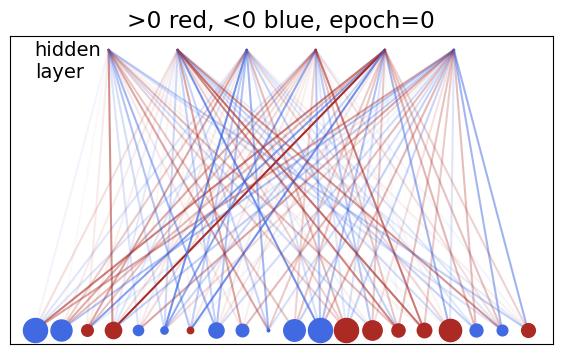

epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8


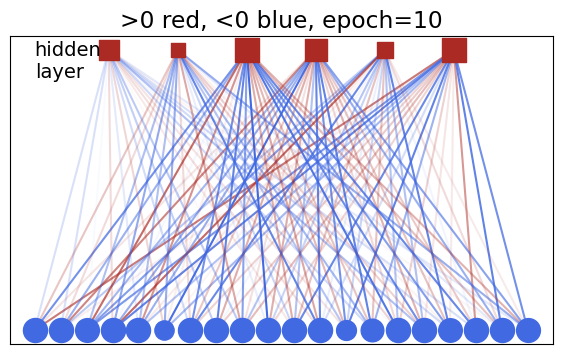

Calculating the energy...
epoch =  9
epoch =  10
epoch =  11
epoch =  12
epoch =  13
epoch =  14
epoch =  15
epoch =  16
epoch =  17
epoch =  18


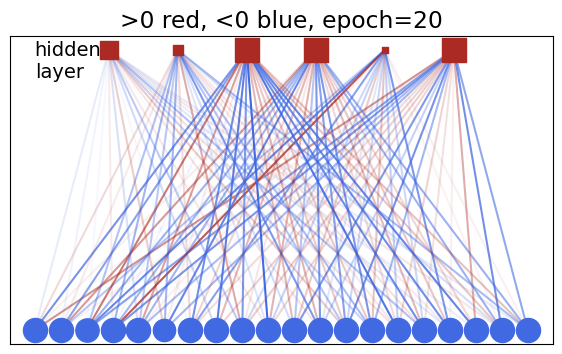

Calculating the energy...
epoch =  19
epoch =  20
epoch =  21
epoch =  22
epoch =  23
epoch =  24
epoch =  25
epoch =  26
epoch =  27
epoch =  28


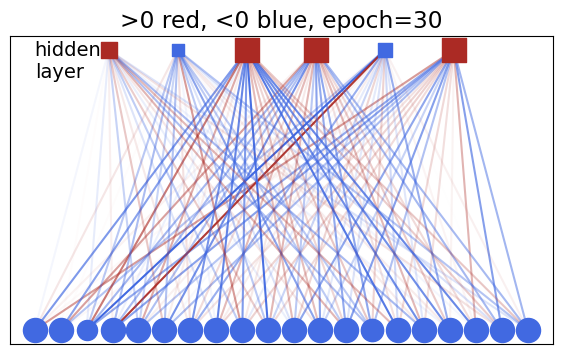

Calculating the energy...
epoch =  29
epoch =  30
epoch =  31
epoch =  32
epoch =  33
epoch =  34
epoch =  35
epoch =  36
epoch =  37
epoch =  38


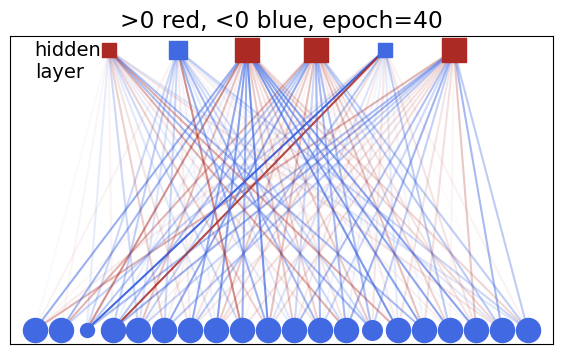

Calculating the energy...
epoch =  39
epoch =  40
epoch =  41
epoch =  42
epoch =  43
epoch =  44
epoch =  45
epoch =  46
epoch =  47
epoch =  48


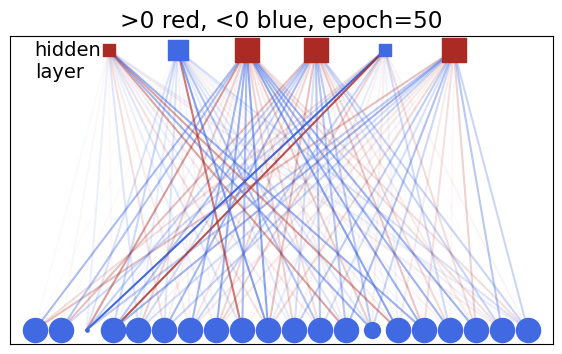

Calculating the energy...
epoch =  49
epoch =  50
epoch =  51
epoch =  52
epoch =  53
epoch =  54
epoch =  55
epoch =  56
epoch =  57
epoch =  58


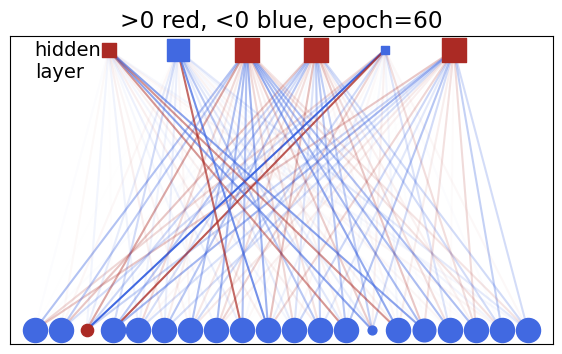

Calculating the energy...
epoch =  59
epoch =  60
epoch =  61
epoch =  62
epoch =  63
epoch =  64
epoch =  65
epoch =  66
epoch =  67
epoch =  68


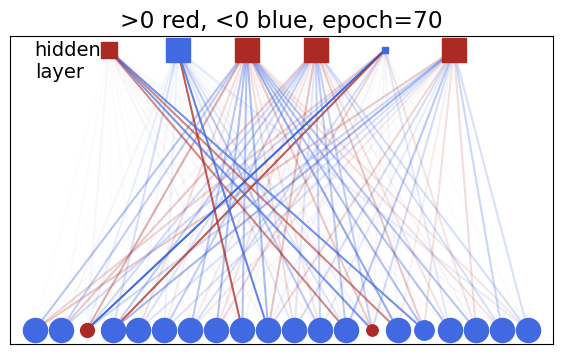

Calculating the energy...
epoch =  69
epoch =  70
epoch =  71
epoch =  72
epoch =  73
epoch =  74
epoch =  75
epoch =  76
epoch =  77
epoch =  78


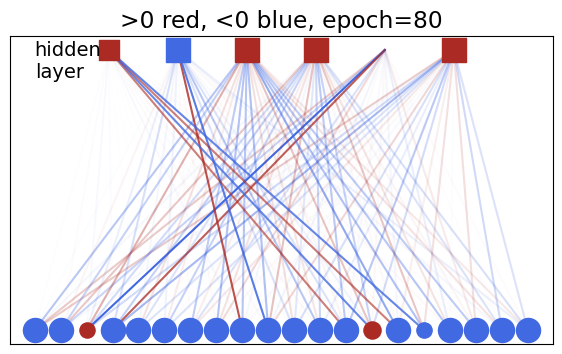

Calculating the energy...
epoch =  79
epoch =  80
epoch =  81
epoch =  82
epoch =  83
epoch =  84
epoch =  85
epoch =  86
epoch =  87
epoch =  88


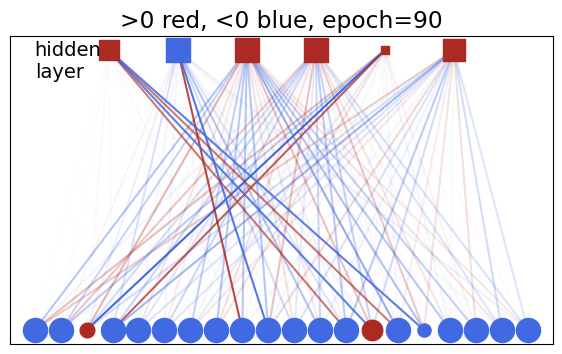

Calculating the energy...
epoch =  89
epoch =  90
epoch =  91
epoch =  92
epoch =  93
epoch =  94
epoch =  95
epoch =  96
epoch =  97
epoch =  98


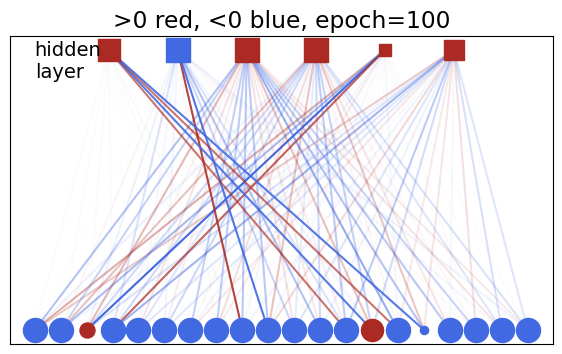

Calculating the energy...
epoch =  99
epoch =  100
epoch =  101
epoch =  102
epoch =  103
epoch =  104
epoch =  105
epoch =  106
epoch =  107
epoch =  108


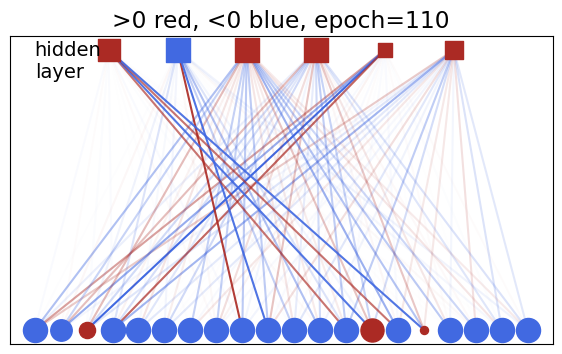

Calculating the energy...
epoch =  109
epoch =  110
epoch =  111
epoch =  112
epoch =  113
epoch =  114
epoch =  115
epoch =  116
epoch =  117
epoch =  118


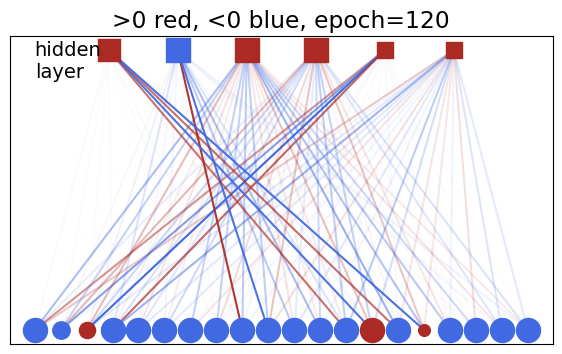

Calculating the energy...
epoch =  119
epoch =  120
epoch =  121
epoch =  122
epoch =  123
epoch =  124
epoch =  125
epoch =  126
epoch =  127
epoch =  128


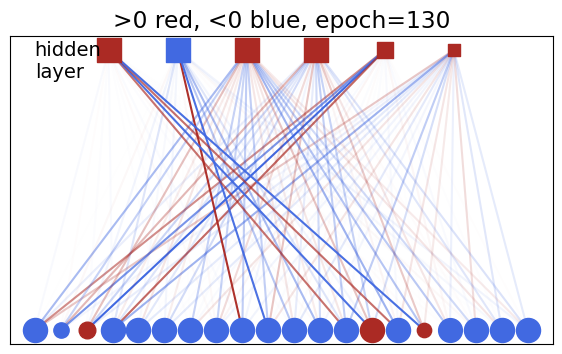

Calculating the energy...
epoch =  129
epoch =  130
epoch =  131
epoch =  132
epoch =  133
epoch =  134
epoch =  135
epoch =  136
epoch =  137
epoch =  138


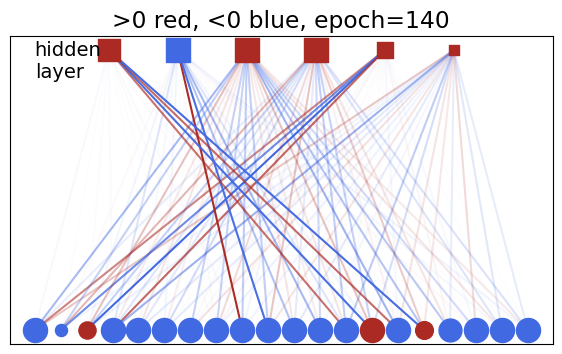

Calculating the energy...
epoch =  139
epoch =  140
epoch =  141
epoch =  142
epoch =  143
epoch =  144
epoch =  145
epoch =  146
epoch =  147
epoch =  148


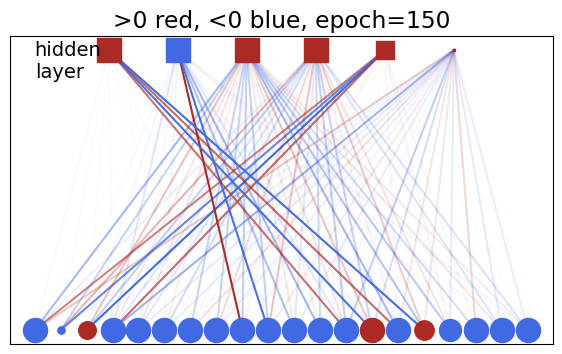

Calculating the energy...
epoch =  149
epoch =  150
epoch =  151
epoch =  152
epoch =  153
epoch =  154
epoch =  155
epoch =  156
epoch =  157
epoch =  158


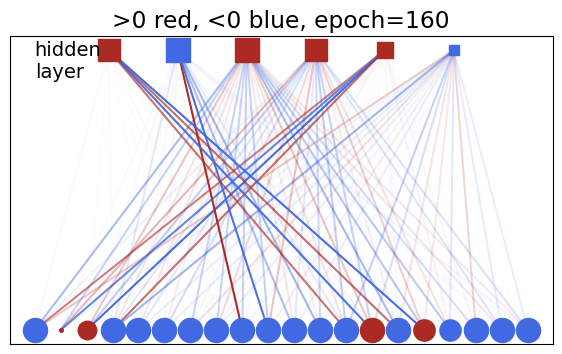

Calculating the energy...
epoch =  159
epoch =  160
epoch =  161
epoch =  162
epoch =  163
epoch =  164
epoch =  165
epoch =  166
epoch =  167
epoch =  168


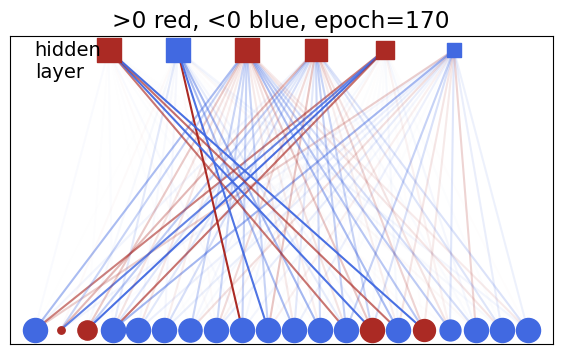

Calculating the energy...
epoch =  169
epoch =  170
epoch =  171
epoch =  172
epoch =  173
epoch =  174
epoch =  175
epoch =  176
epoch =  177
epoch =  178


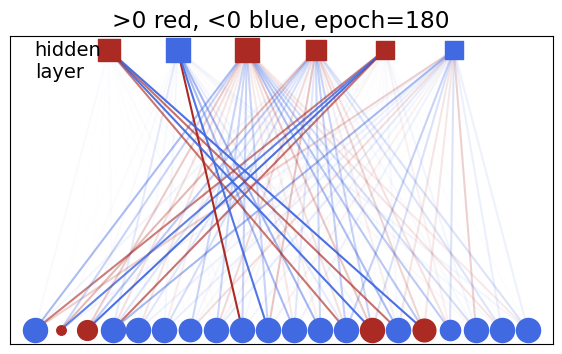

Calculating the energy...
epoch =  179
epoch =  180
epoch =  181
epoch =  182
epoch =  183
epoch =  184
epoch =  185
epoch =  186
epoch =  187
epoch =  188


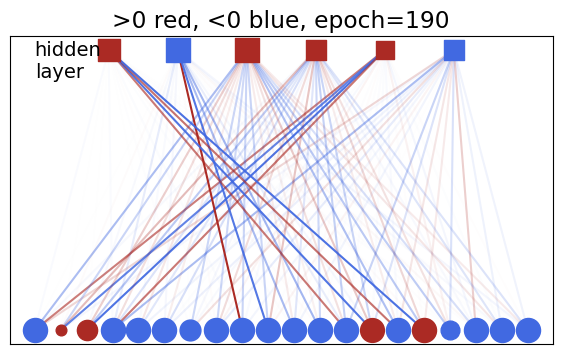

Calculating the energy...
epoch =  189
epoch =  190
epoch =  191
epoch =  192
epoch =  193
epoch =  194
epoch =  195
epoch =  196
epoch =  197
epoch =  198


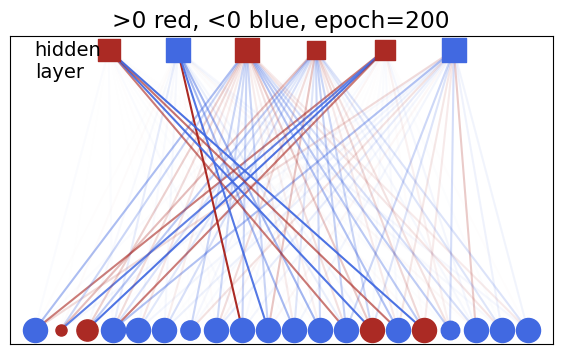

Calculating the energy...
epoch =  199
epoch =  200
epoch =  201
epoch =  202
epoch =  203
epoch =  204
epoch =  205
epoch =  206
epoch =  207
epoch =  208


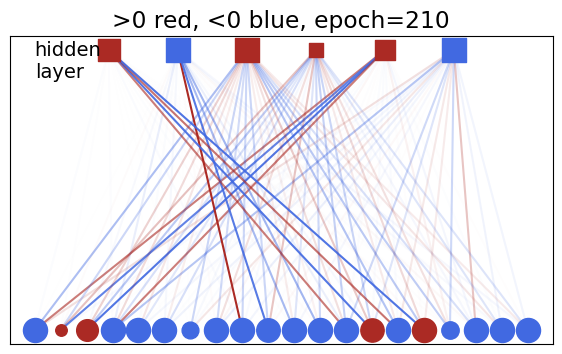

Calculating the energy...
epoch =  209
epoch =  210
epoch =  211
epoch =  212
epoch =  213
epoch =  214
epoch =  215
epoch =  216
epoch =  217
epoch =  218


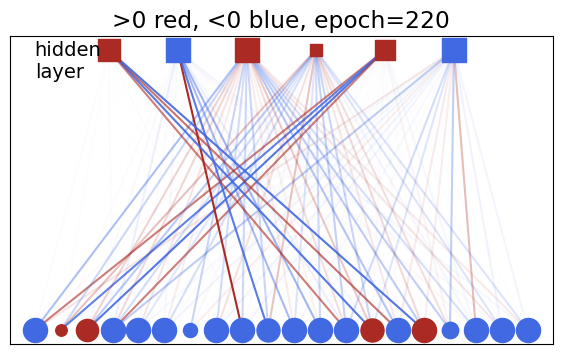

Calculating the energy...
epoch =  219
epoch =  220
epoch =  221
epoch =  222
epoch =  223
epoch =  224
epoch =  225
epoch =  226
epoch =  227
epoch =  228


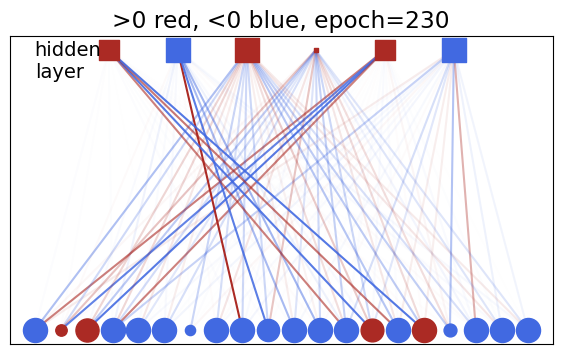

Calculating the energy...
epoch =  229
epoch =  230
epoch =  231
epoch =  232
epoch =  233
epoch =  234
epoch =  235
epoch =  236
epoch =  237
epoch =  238


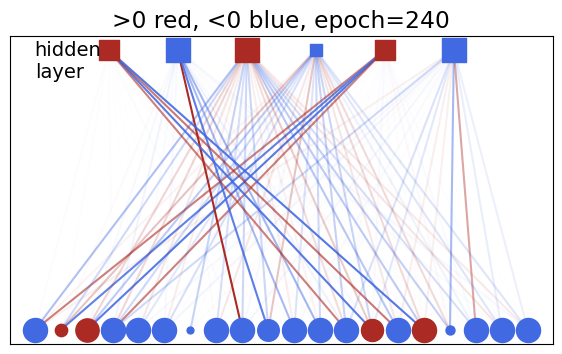

Calculating the energy...
epoch =  239
epoch =  240
epoch =  241
epoch =  242
epoch =  243
epoch =  244
epoch =  245
epoch =  246
epoch =  247
epoch =  248


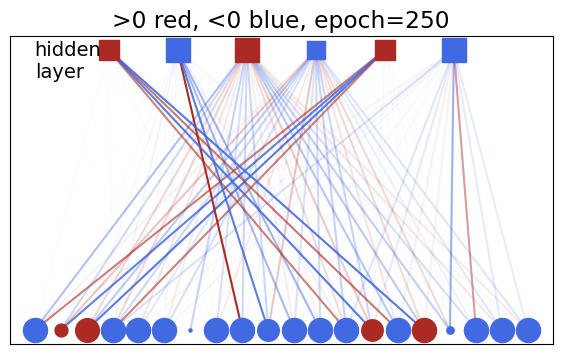

Calculating the energy...
epoch =  249
epoch =  250
epoch =  251
epoch =  252
epoch =  253
epoch =  254
epoch =  255
epoch =  256
epoch =  257
epoch =  258


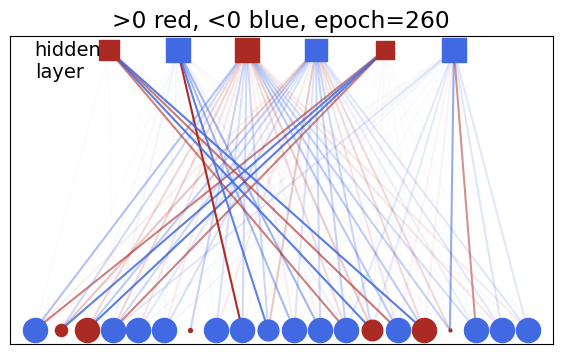

Calculating the energy...
epoch =  259
epoch =  260
epoch =  261
epoch =  262
epoch =  263
epoch =  264
epoch =  265
epoch =  266
epoch =  267
epoch =  268


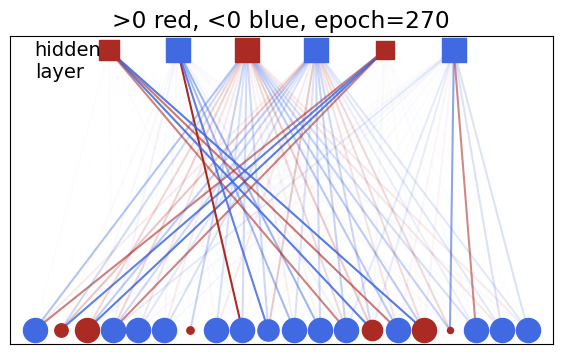

Calculating the energy...
epoch =  269
epoch =  270
epoch =  271
epoch =  272
epoch =  273
epoch =  274
epoch =  275
epoch =  276
epoch =  277
epoch =  278


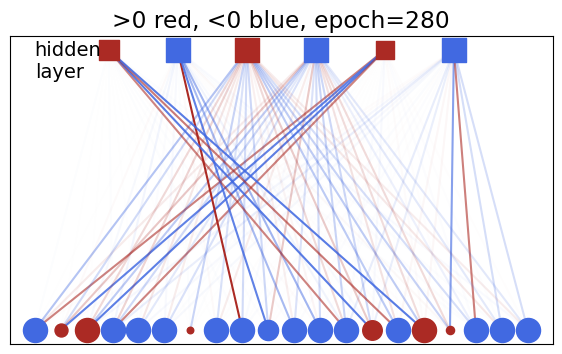

Calculating the energy...
epoch =  279
epoch =  280
epoch =  281
epoch =  282
epoch =  283
epoch =  284
epoch =  285
epoch =  286
epoch =  287
epoch =  288


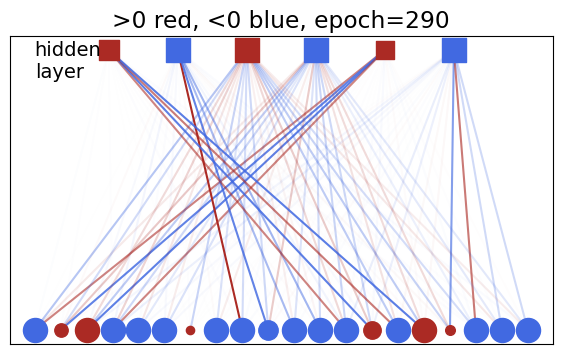

Calculating the energy...
epoch =  289
epoch =  290
epoch =  291
epoch =  292
epoch =  293
epoch =  294
epoch =  295
epoch =  296
epoch =  297
epoch =  298


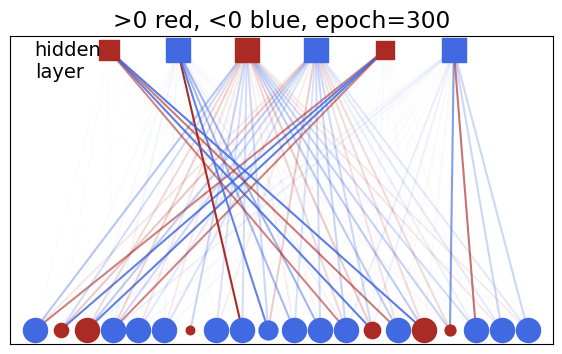

Calculating the energy...
epoch =  299


In [16]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate for SGD
l_rate = 1.0

# One-hot encoding
nBlocks = int(L/4)

# minibatch
mini, m = mini_batch_size, 0

# Adam definition
adam = AdamOptim()

# CD-n iterations
n = CD

# Time for Adam
t = 1 

# Number of epochs
epochs = 300

# Centering trick parameters
zed_a, zed_b = 0.01, 0.01

# energy & entropy sampling
A_S, A_T, energy, entropy = [], [], [], []
score, log_res = [], []

# train model
print('===================================================')
for epoch in range(epochs):
    havg, vavg = np.full(M, 0.25), np.full(L, 0.25)
    # aggregate normalization of batch statistics and learning rate
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
            if centering:
                vdat, vmod, hdat, hmod = np.zeros((mini, L)), np.zeros((mini, L)), np.zeros((mini, M)), np.zeros((mini, M))
        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        h0 = np.copy(h)
        # negative CD phase: generating fantasy vf
        for _ in range(n):
            # negative CD phase: generating fantasy vf
            vf = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h, w.T, a, GAP)  # fantasy unit
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf, w, b, GAP)
            h = np.copy(hf) 

        
        v_data  += v[k]
        v_model += vf
        h_data  += h0   # h
        h_model += hf
        if not centering:
            vh_data += np.outer(v[k].T,h0)  # h
            vh_model+= np.outer(vf.T,hf)
    
        # centering trick
        if centering:
            vdat[m] = v[k]
            vmod[m] = vf
            hdat[m] = h0
            hmod[m] = hf
    
        m += 1
        # minibatch
        if m==mini:

            if centering:
                # Centering Trick
                havg_batch = h_data/mini
                vavg_batch = v_data/mini
                # Bortoletto uses hi*wij*vj so the opposite of our indexing
                a = a + zed_b*np.dot(w, (havg_batch - havg))
                b = b + zed_a*np.dot(w.T, (vavg_batch - vavg))

                vavg = (1 - zed_a)*vavg + zed_a*vavg_batch
                havg = (1 - zed_b)*havg + zed_b*havg_batch

                for l in range(mini):
                    vh_data += np.outer((vdat[l] - vavg).T,(hdat[l] - havg))
                    vh_model += np.outer((vmod[l] - vavg).T,(hmod[l] - havg))

            # gradient of the likelihood: follow it along its positive direction
            # Adam update:
            dw = (vh_data - vh_model)/mini  # gradient variable
            da = (v_data - v_model)/mini    # gradient variable
            db = (h_data - h_model)/mini    # gradient variable
            # Adam update:
            w, a, b = adam.update(t, w, a, b, dw, da, db) if ADAM else vanilla(w, a, b, dw*l_rate, da*l_rate, db*l_rate)
            l_rate = l_rate / (0.01 * l_rate + 1) # if not ADAM
            m=0
            t+=1

    if epoch%10==9:
        plotgraph(epoch+1)

        # calculation for each epoch
        # original, non-reshuffled data in v0
        v1 = np.zeros_like(v0)
        hfin = np.zeros((N, M))
        for k in range(N):
            # positive CD phase: generating h 
            hfin[k] = activate(v0[k],w,b,GAP)
            # negative CD phase: generating fantasy vf
            v1[k] = one_hot_generator(nBlocks, w, hfin[k], a) if one_hot else activate(hfin[k],w.T,a,GAP)
        
        # energy
        if Iwant_energy:
            a1, a2, en = E(v0, v1)
            A_S.append(a1)
            A_T.append(a2)
            energy.append(en)

        # entropy
        entropy.append(S(v0, v1))

        # our score
        score.append(our_score(v0, v1))

        # log likelihood
        log_res.append(log_likelihood(w, a, b, v0, hfin))
    # randomize the order of input data
    np.random.shuffle(v)
    
    print('epoch = ', epoch)

In [17]:
w[:3], a, b, dw[:3], da, db

(array([[ -0.08979624,  -0.02592631,  -4.94841339,   1.36190334,
           7.71138657,   0.07187316],
        [ -0.08248835,   0.23916821,  -3.06091702,   3.30477377,
         -10.9220586 ,   0.1640897 ],
        [  0.02100828,  -0.46910069,   2.22553832,  -4.46121745,
         -11.07681144,  -0.72719169]]),
 array([-5.89825214,  0.21015914,  0.69428254, -7.13107523, -1.58469261,
        -1.11581774,  0.07569942, -1.24407775, -5.7618261 , -0.36719324,
        -0.90503518, -0.61841883, -6.84580744,  0.27681303, -6.7079885 ,
         1.04511903,  0.12239786, -2.74316532, -1.35582663, -1.19875663]),
 array([ 0.44843156, -4.46774164,  2.66252505, -0.97796118,  0.35931395,
        -2.18618964]),
 array([[ 0.02,  0.02, -0.02,  0.02,  0.02,  0.02],
        [ 0.  ,  0.  ,  0.02,  0.02,  0.  ,  0.  ],
        [-0.02,  0.  , -0.02,  0.  ,  0.  , -0.02]]),
 array([ 0.02,  0.  , -0.02,  0.  ,  0.06, -0.02, -0.08,  0.1 ,  0.  ,
         0.04, -0.06,  0.06, -0.04,  0.02, -0.02,  0.02, -0.02,  0.  ,

In [18]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl = 40.
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h,w.T,a,ampl*GAP)

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df1.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for _ in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

C:\Users\ricta\AppData\Local\Temp\ipykernel_27124\3092190628.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1. / (1. + np.exp(-DE*act))     # updated sigmoid function


Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0

In [19]:
# Programma che controlla se i dati sono giusti 

scores = 0 #fa +1 per ogni riga giusta

#Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
# col - riga

df0 = pd.DataFrame(v0[:N])
df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

nBlocks = int(L/4)

for nRiga in range(N): 
    #Controlla se questa riga è con alternanza sinistra destra
    riga = df1.iloc[nRiga,:]
    positions = [] 
    positionsLettere = [] #scritti "destra" "sinistra"
    corretto = True
    for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
        doppio = 0
        blocchetto = riga[block*4:(block+1)*4]
        indice = 0
        for i in range(4):
            if blocchetto[block*4 + i] == 1:
                indice = i
                doppio += 1
        if doppio != 1:
            corretto = False
        if indice < 2:
            positions.append(0) # 0 --> sinistra
            positionsLettere.append("sinistra ")
        else:
            positions.append(1) # 1 --> destra
            positionsLettere.append("destra ")

    for indice in range(len(positions)-1): #per ogni 0 1 etc
        if positions[indice] == positions[indice+1]:
            corretto = False
    if corretto == True:
        scores += 1
    if corretto == False:
        print(nRiga, " è sbagliata")
        print(positionsLettere)
        
print("Score: ", scores/N)   

0  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
1  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
2  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
3  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'sinistra ']
4  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
5  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
6  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
9  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'sinistra ']
10  è sbagliata
['destra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
11  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
12  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
13  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
14  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'des

In [20]:
# np.savetxt("energy.dat", energy,delimiter=" ",)
# np.savetxt("entropy.dat", entropy,delimiter=" ",)
# np.savetxt("score.dat", score,delimiter=" ",)

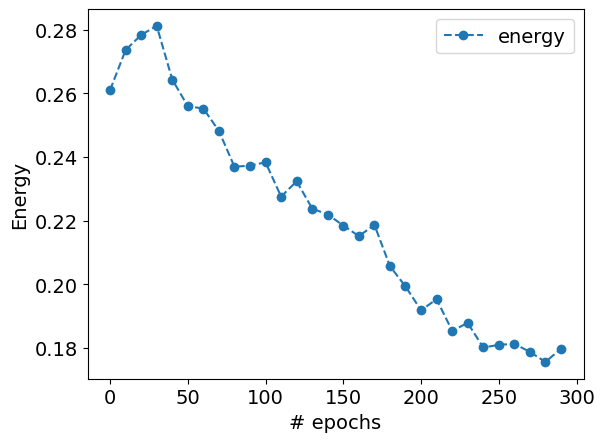

In [21]:
plt.plot(list(range(0, epochs, 10)), energy, label="energy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Energy")
plt.legend()
plt.show()

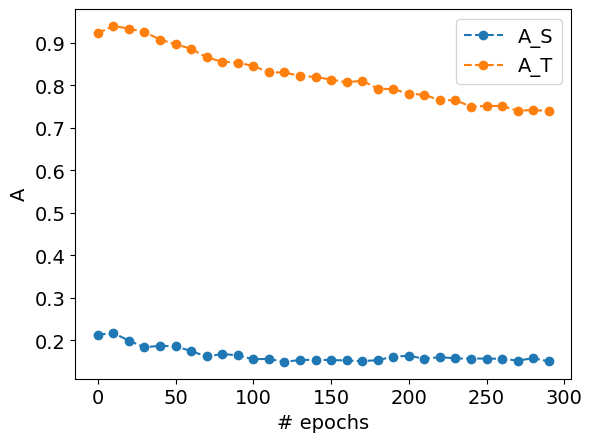

In [22]:
plt.plot(list(range(0, epochs, 10)), A_S, label="A_S", ls="--", marker="o")
plt.plot(list(range(0, epochs, 10)), A_T, label="A_T", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("A")
plt.legend()
plt.show()

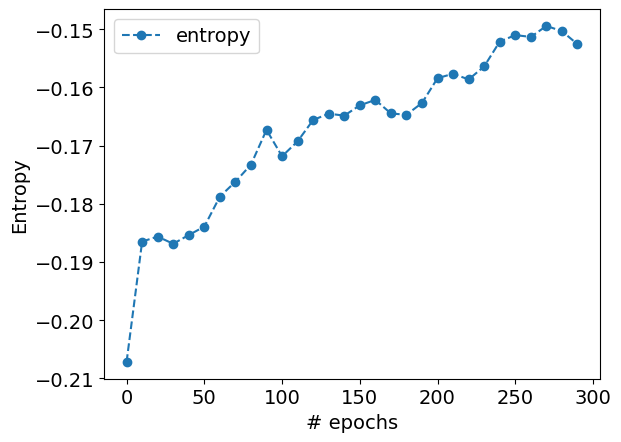

In [23]:
plt.plot(list(range(0, epochs, 10)), entropy, label="entropy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Entropy")
plt.legend()
plt.show()

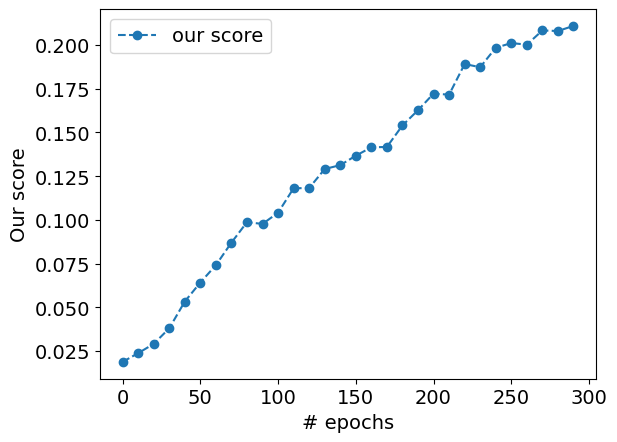

In [24]:
plt.plot(list(range(0, epochs, 10)), score, label="our score", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Our score")
plt.legend()
plt.show()

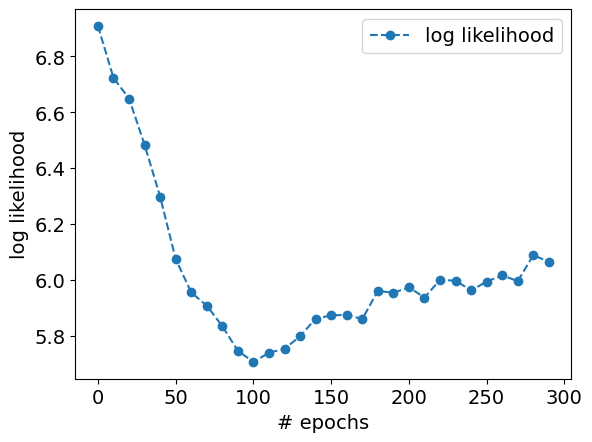

In [25]:
plt.plot(list(range(0, epochs, 10)), log_res, label="log likelihood", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("log likelihood")
plt.legend()
plt.show()

In [26]:
df = pd.DataFrame(columns=["epochs", "energy", "A_S", "A_T", "score", "entropy", "log_likelihood"])
df["epochs"] = list(range(0, epochs, 10))
df["energy"] = energy
df["A_S"] = A_S
df["A_T"] = A_T
df["score"] = score
df["entropy"] = entropy
df["log_likelihood"] = log_res

In [27]:
# df

In [28]:
! mkdir -p "My_data_results_FINALE"

Sottodirectory o file -p gi� esistente.
Errore occorso durante l'elaborazione: -p.
Sottodirectory o file My_data_results_FINALE gi� esistente.
Errore occorso durante l'elaborazione: My_data_results_FINALE.


In [29]:
dir_name = "My_data_results_FINALE"
name = f"Adam_{n}" if ADAM else f"Vanilla_{n}"
name += "_one_hot" if one_hot else ""
name += "_CenteringTrick" if centering else "" 
name += "_Spin" if SPINS else "_NO-Spin" 
file_name = dir_name+"/"+name+".dat"
np.savetxt(file_name, df, delimiter=" ", header="epochs, energy, A_S, A_T, score, entropy, log_likelihood", comments="")

In [30]:
print(f"{file_name} created!")

My_data_results_FINALE/Adam_1_NO-Spin.dat created!


In [31]:
# to see that everything had worked
read_result = pd.read_csv(file_name, delimiter=" ")
read_result

epochs,   energy,    A_S,    A_T,  score,  entropy,  log_likelihood
0       0.0  0.261017  0.2129  0.9226  0.0188 -0.207174        6.909326
1      10.0  0.273595  0.2167  0.9397  0.0238 -0.186487        6.723160
2      20.0  0.278350  0.1990  0.9333  0.0291 -0.185632        6.649257
3      30.0  0.281157  0.1832  0.9252  0.0380 -0.186869        6.483634
4      40.0  0.264314  0.1868  0.9077  0.0533 -0.185366        6.297660
5      50.0  0.255934  0.1858  0.8965  0.0642 -0.183917        6.074331
6      60.0  0.255219  0.1742  0.8861  0.0741 -0.178759        5.954639
7      70.0  0.248178  0.1616  0.8656  0.0870 -0.176201        5.907445
8      80.0  0.236937  0.1675  0.8555  0.0987 -0.173262        5.833686
9      90.0  0.237303  0.1643  0.8530  0.0977 -0.167290        5.745612
10    100.0  0.238326  0.1552  0.8456  0.1041 -0.171831        5.705849
11    110.0  0.227569  0.1559  0.8304  0.1181 -0.169260        5.738814
12    120.0  0.232373  0.1488  0.8302  0.1182 -0.165590        5.752775
13    130.0  0.223816  0.1534  0.8220  0.1291 -0.164505        5.797753
14    140.0  0.221935  0.1538  0.8195  0.1313 -0.164846        5.861081
15    150.0  0.218490  0.1532  0.8134  0.1367 -0.163074        5.872263
16    160.0  0.215152  0.1522  0.8069  0.1415 -0.162138        5.874907
17    170.0  0.218685  0.1505  0.8107  0.1417 -0.164474        5.859141
18    180.0  0.205720  0.1531  0.7922  0.1540 -0.164691        5.960418
19    190.0  0.199360  0.1611  0.7907  0.1627 -0.162669        5.953413
20    200.0  0.191868  0.1634  0.7803  0.1722 -0.158405        5.973028
21    210.0  0.195342  0.1560  0.7775  0.1716 -0.157648        5.936580
22    220.0  0.185447  0.1604  0.7648  0.1891 -0.158626        5.999885
23    230.0  0.187890  0.1569  0.7649  0.1873 -0.156384        5.996762
24    240.0  0.180186  0.1568  0.7498  0.1984 -0.152120        5.961931
25    250.0  0.181007  0.1567  0.7513  0.2011 -0.150999        5.993503
26    260.0  0.181350  0.1562  0.7513  0.2002 -0.151320        6.015942
27    270.0  0.178800  0.1520  0.7402  0.2083 -0.149425        5.995090
28    280.0  0.175657  0.1576  0.7417  0.2080 -0.150325        6.088398
29    290.0  0.179790  0.1501  0.7395  0.2109 -0.152567        6.064533